<a href="https://colab.research.google.com/github/Denys20233/University/blob/main/Pidhainyi_%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підсумкова контрольна робота КСВД



In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import plotly.express as px


**Завдання 1**

Загрузити датасет Global YouTube Statistics 2023
Виконайте наступні завдання:
1. Прочитайте CSV файл

In [ ]:
uploaded = files.upload()

Saving Global YouTube Statistics.csv to Global YouTube Statistics.csv


In [ ]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='cp1252')

2. Виведіть перші п'ять рядків

In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів

In [ ]:
df.shape

(995, 28)

In [ ]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


In [ ]:
df.duplicated().sum()

np.int64(0)

4. Якщо є пропуски, замінить тип даних на float і середнє значення за стовпцем

In [ ]:
df = df.astype(float, errors='ignore')
df = df.fillna(df.mean(numeric_only=True), axis=0)

5. Ще раз перевірте кількість пропусків

In [ ]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


6. Перевірте, скільки унікальних країн представлено у колонці "Country"

In [ ]:
df['Country'].nunique()

49

7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):


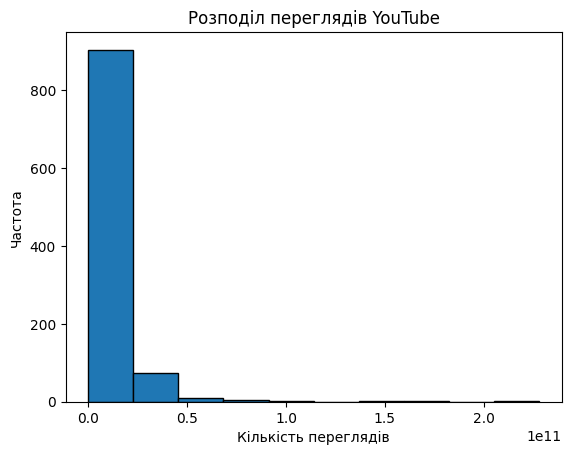

In [ ]:
df['video views'].plot(kind='hist', edgecolor='black')
plt.xlabel('Кількість переглядів')
plt.ylabel('Частота')
plt.title('Розподіл переглядів YouTube')
plt.show()

8. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)

In [ ]:
df['video views'].max()

228000000000.0

In [ ]:
df['video views'].min()

0.0

In [ ]:
df['video views'].mean()

np.float64(11039537052.03819)

9. Знайдіть країну, де найбільше відео було завантажено на YouTube

In [ ]:
df.loc[df['uploads'].idxmax()]['Country']

'India'

10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads

In [ ]:
df[df['uploads'] == df['uploads'].max()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
95,96.0,ABP NEWS,37000000.0,1.310261e+10,People & Blogs,ABP NEWS,301308.0,India,IN,News,...,400000.0,2012.0,Jun,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288


In [ ]:
df[df['uploads'] == df['uploads'].min()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6.0,Music,119000000.0,0.000000e+00,NaN,Music,0.0,NaN,NaN,Music,...,349079.132219,2013.000000,Sep,24.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
12,13.0,Gaming,93600000.0,0.000000e+00,NaN,Gaming,0.0,NaN,NaN,Games,...,349079.132219,2013.000000,Dec,15.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
57,58.0,BRIGHT SIDE,44500000.0,1.070853e+10,Howto & Style,brightside,0.0,NaN,NaN,NaN,...,1.000000,2005.000000,Nov,18.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
73,74.0,Luisito Comunica,40600000.0,8.670474e+09,Comedy,Luis Arturo Villar Sudek,0.0,Mexico,MX,Comedy,...,349079.132219,2010.000000,Jun,18.000000,40.200000,1.260140e+08,3.420000,1.026269e+08,23.634501,-102.552784
102,103.0,News,36300000.0,0.000000e+00,NaN,News,0.0,NaN,NaN,NaN,...,349079.132219,2013.000000,Sep,9.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
113,114.0,T-Series Apna Punjab,34600000.0,2.130632e+10,Music,T- Series Apna Punjab,0.0,NaN,NaN,News,...,349079.132219,2020.000000,Jul,9.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
149,150.0,Luis Fonsi,31400000.0,1.517676e+10,Entertainment,luisfonsi,0.0,NaN,NaN,NaN,...,349079.132219,2006.000000,Mar,31.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
166,167.0,Frost Diamond,30100000.0,7.277494e+09,Gaming,frostdiamond,0.0,NaN,NaN,NaN,...,6.000000,2006.000000,Aug,10.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
180,181.0,Aditya Music India,28500000.0,2.585799e+10,Music,Aditya Music,0.0,NaN,NaN,Music,...,349079.132219,2010.000000,Dec,16.000000,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
190,191.0,Sandeep Maheshwari,27800000.0,2.303069e+09,People & Blogs,Sandeepmaheshwari,0.0,Singapore,SG,NaN,...,1.000000,2008.000000,Jan,2.000000,84.800000,5.703569e+06,4.110000,5.703569e+06,1.352083,103.819836


**Завдання 2**

Зчитати архів Customer Shopping Trends Dataset.

Далі працюємо з файлом shopping_trends.csv

Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип
стовпців. Перейменуйте назви стовпців: Змініть прописні букви на строчні
(маленькі) та пробіл на підкреслення.



In [ ]:
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [ ]:
df = pd.read_csv('shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
df.shape

(3900, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Далі виконайте наступні завдання. Побудуйте графіки з використанням
бібліотеки seaborn.

Гістограма віку (age):
1. Побудуйте гістограму віку клієнтів, використовуючи Seaborn.

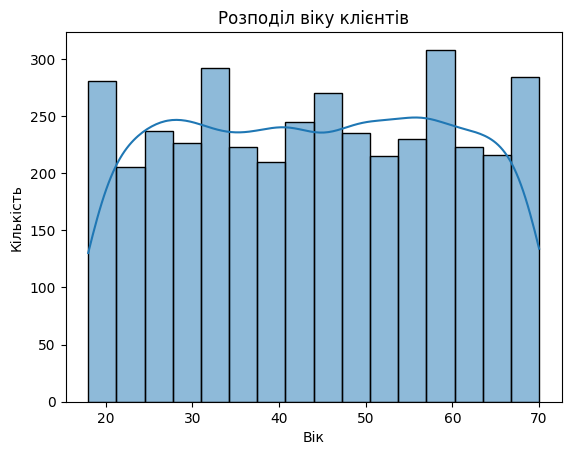

In [ ]:
sns.histplot(data = df, x = 'age', kde = True)
plt.title('Розподіл віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

Порівняння розподілу покупок за статтею (item_purchased):
2. Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які
товари покупають клієнти найчастіше.

<ipython-input-29-0ede51e60441>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y = 'item_purchased',


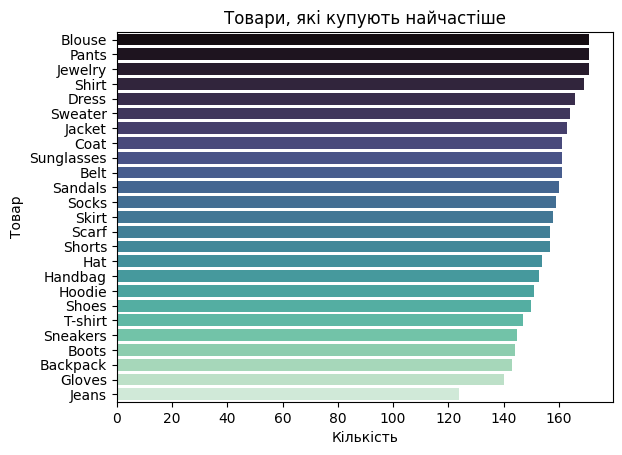

In [ ]:
sns.countplot(data = df, y = 'item_purchased',
              order = df['item_purchased'].value_counts().index,
              palette='mako')
plt.title('Товари, які купують найчастіше')
plt.xlabel('Кількість')
plt.ylabel('Товар')
plt.show()

Залежність між віком та сумою покупок (purchase_amount):
3. Використовуйте scatter plot, щоб візуалізувати залежність між віком та
сумою покупок.

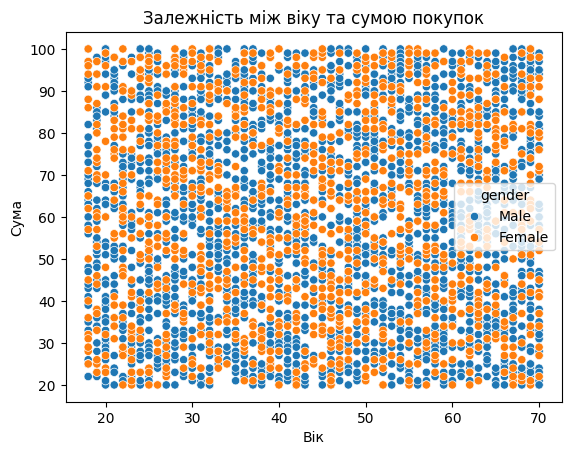

In [ ]:
sns.scatterplot(data = df, x = 'age', y = 'purchase_amount_(usd)', hue = 'gender')
plt.title('Залежність між віку та сумою покупок')
plt.xlabel('Вік')
plt.ylabel('Сума')
plt.show()

Графік розподілу оцінок товарів (review_rating):
4. Побудуйте графік розподілу оцінок товарів для оцінки якості.

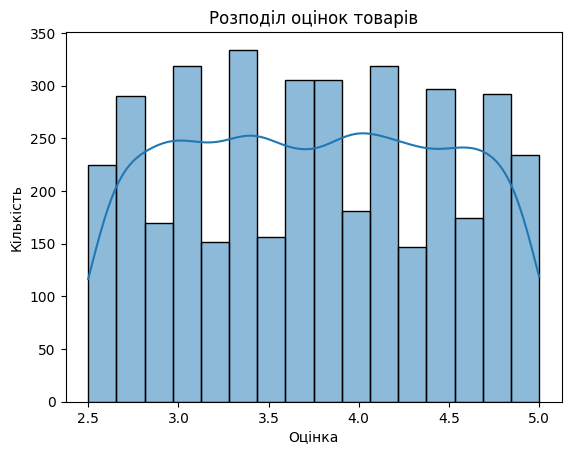

In [ ]:
sns.histplot(data = df, x = 'review_rating', kde = True)
plt.title('Розподіл оцінок товарів')
plt.xlabel('Оцінка')
plt.ylabel('Кількість')
plt.show()

Категоріальна діаграма для статі (gender):
5. Створіть категоріальну діаграму, щоб відобразити розподіл покупок за
статтею.

<ipython-input-34-b89faeec7cc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'gender', palette = 'mako')


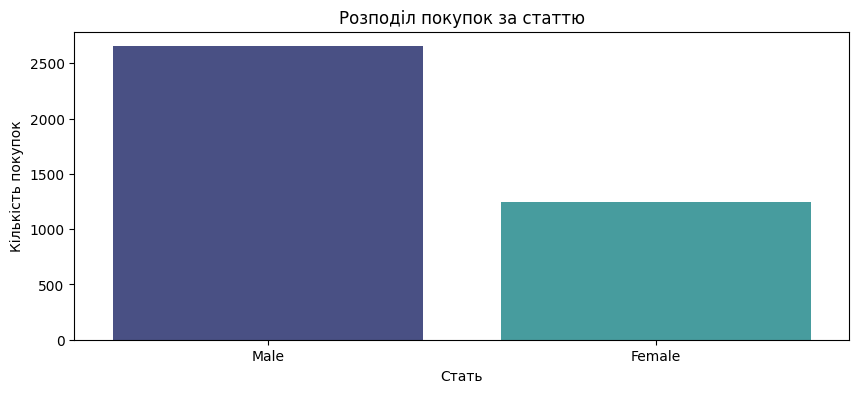

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(data = df, x = 'gender', palette = 'mako')
plt.title('Розподіл покупок за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість покупок')
plt.show()

6. Залежність між рейтингом і сумою покупок (review_rating і
purchase_amount)

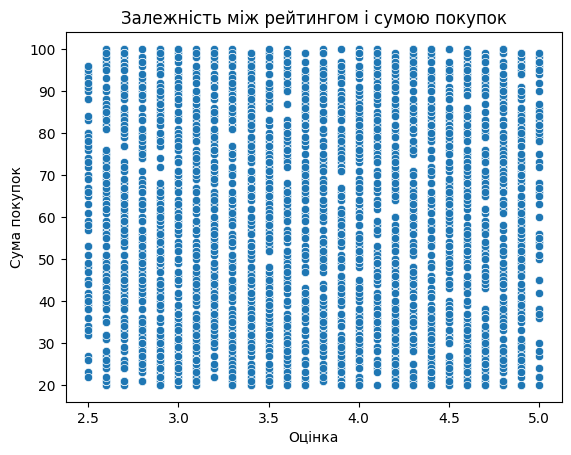

In [ ]:
sns.scatterplot(data = df, x = 'review_rating', y = 'purchase_amount_(usd)')
plt.title('Залежність між рейтингом і сумою покупок')
plt.xlabel('Оцінка')
plt.ylabel('Сума покупок')
plt.show()

**Завдання 3**
1. Створіть горизонтальну діаграму з мітками на основі даних про
врожайність пшениці (data.wheat()) за допомогою бібліотеки Altair.
Задайте вісь x для врожайності пшениці, вісь y для років, а текстові
мітки відображайте значення врожайності пшениці на відповідних
роках.

In [ ]:
source = data.wheat()

chart1 = alt.layer(
    alt.Chart(source).mark_bar().encode(
        x=alt.X('wheat:Q', title='Врожайність пшениці'),
        y=alt.Y('year:O', title='Рік', sort='-x')
    ),
    alt.Chart(source).mark_text(
        align='left',
        baseline='middle',
        dx=3
    ).encode(
        x='wheat:Q',
        y='year:O',
        text='wheat:Q'
    )
).properties(
    title='Врожайність пшениці по роках',
    width=700,
    height=700
)

chart1

alt.LayerChart(...)

2. Створіть багатошарову діаграму на основі даних про виробництво
електроенергії в штаті Айова (data.iowa_electricity()) за допомогою
бібліотеки Altair . Вісь x представляє роки, вісь y відображає чисте
виробництво електроенергії (net_generation), а кожен шар діаграми
позначає різні джерела енергії (source). Встановіть прозорість (opacity)
для стовпців на рівні 0.7.

In [ ]:
source = data.iowa_electricity()

chart2 = alt.Chart(source).mark_bar(opacity=0.7).encode(
        x='year:O', y='net_generation:Q',
        color=alt.Color('source:N', scale=alt.Scale(scheme='viridis')),
        tooltip=['year:T', 'net_generation:Q', 'source:N']
).properties(
    title='Виробництво електроенергії в штаті Айова за різними джерелами')

chart2

alt.Chart(...)

3. Створіть графік за допомогою бібліотеки Plotly (scatter plot) для даних
ірисів (iris dataset), де:
Вісь X (x-axis) відповідає ширині чашелистика (sepal width).
Вісь Y (y-axis) відповідає довжині чашелистика (sepal length).
Кожен пункт на графіку має розмір, який залежить від довжини
пелюстки (petal length).
Кожен пункт на графіку має різний колір в залежності від виду
(species).
При наведенні на пункт повинні відображатися додаткові дані, такі як
ширина пелюстки (petal width)

In [ ]:
df = px.data.iris()

fig = px.scatter(df, x='sepal_width', y='sepal_length', size='petal_length', hover_data=['petal_width'],
                 color='species', color_discrete_sequence=px.colors.sequential.Viridis,
                 title="Графік ірисів: Ширина чашелистика vs Довжина чашелистика")
fig.show()